In [1]:
#Preliminaries

from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [3]:
## Load in the data set

diabetes_df = pd.read_csv('pima-indians-diabetes.csv', header=None)

In [4]:
#Looking at the data
print(diabetes_df.shape)
diabetes_df.head()

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = diabetes_df.drop(8, axis = 1)
y = diabetes_df[8]

In [6]:
from sklearn.preprocessing import scale
X = scale(X)

In [7]:
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)


In [8]:
np.mean(y), np.mean(1-y)


(0.3489583333333333, 0.6510416666666666)

In [9]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [10]:
# Make predictions on the test set
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.781
roc-auc is 0.836


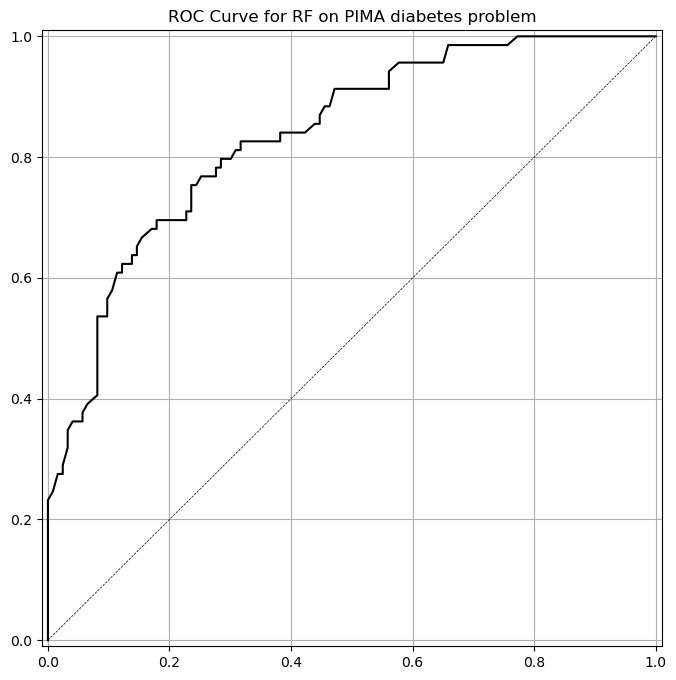

In [11]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

In [12]:
## Normalize the data

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [13]:
# Define the Model 

model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Fit(Train) the Model

# Compile the model
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 0.8322 - accuracy: 0.3628 - val_loss: 0.8165 - val_accuracy: 0.3750
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8203 - accuracy: 0.3663 - val_loss: 0.8059 - val_accuracy: 0.3854
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.3733 - val_loss: 0.7960 - val_accuracy: 0.4010
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7986 - accuracy: 0.3854 - val_loss: 0.7866 - val_accuracy: 0.4115
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7887 - accuracy: 0.3941 - val_loss: 0.7777 - val_accuracy: 0.4167
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7793 - accuracy: 0.3976 - val_loss: 0.7693 - val_accuracy: 0.4271
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7704 - accuracy: 0.3993 - val_loss: 0.7613 - val_accuracy: 0.4219
Epoch 8/200


In [16]:
# Generate two kinds of predictions

y_pred_prob_nn_1 = model_1.predict(X_test_norm)
y_pred_class_nn_1 = (model_1.predict(X_test_norm) >0.5).astype("int32")

6/6 [==============================] - 0s 901us/step


In [17]:
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [18]:
y_pred_prob_nn_1[:10]

array([[0.58468354],
       [0.66443056],
       [0.26062527],
       [0.2998134 ],
       [0.17711902],
       [0.35181525],
       [0.08644296],
       [0.35137704],
       [0.92432445],
       [0.22400777]], dtype=float32)

In [19]:
accuracy_score(y_test, y_pred_class_nn_1)

0.7864583333333334

roc-auc is 0.816


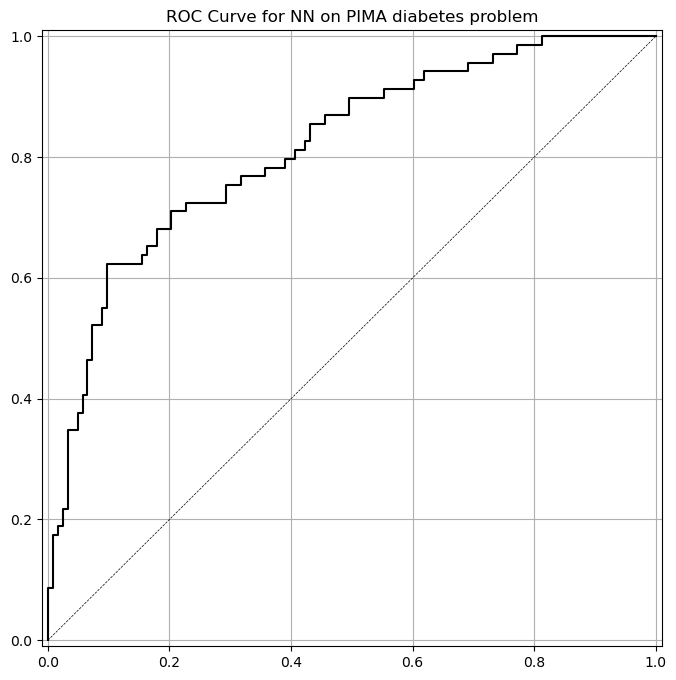

In [20]:
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [21]:
run_hist_1.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

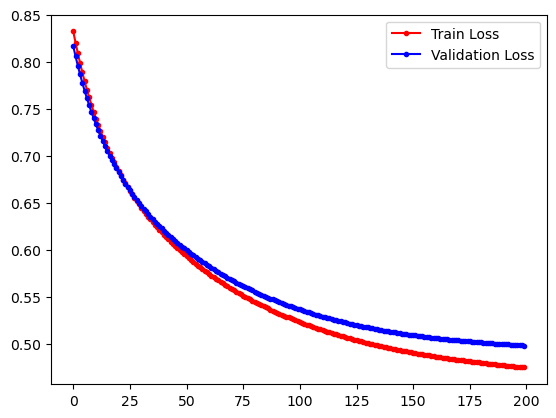

In [22]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [23]:
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.7656 - val_loss: 0.4984 - val_accuracy: 0.7865
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7656 - val_loss: 0.4983 - val_accuracy: 0.7865
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7656 - val_loss: 0.4982 - val_accuracy: 0.7865
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7656 - val_loss: 0.4980 - val_accuracy: 0.7865
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7656 - val_loss: 0.4979 - val_accuracy: 0.7865
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7639 - val_loss: 0.4977 - val_accuracy: 0.7865
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7639 - val_loss: 0.4976 - val_accuracy: 0.7865
Epoch 

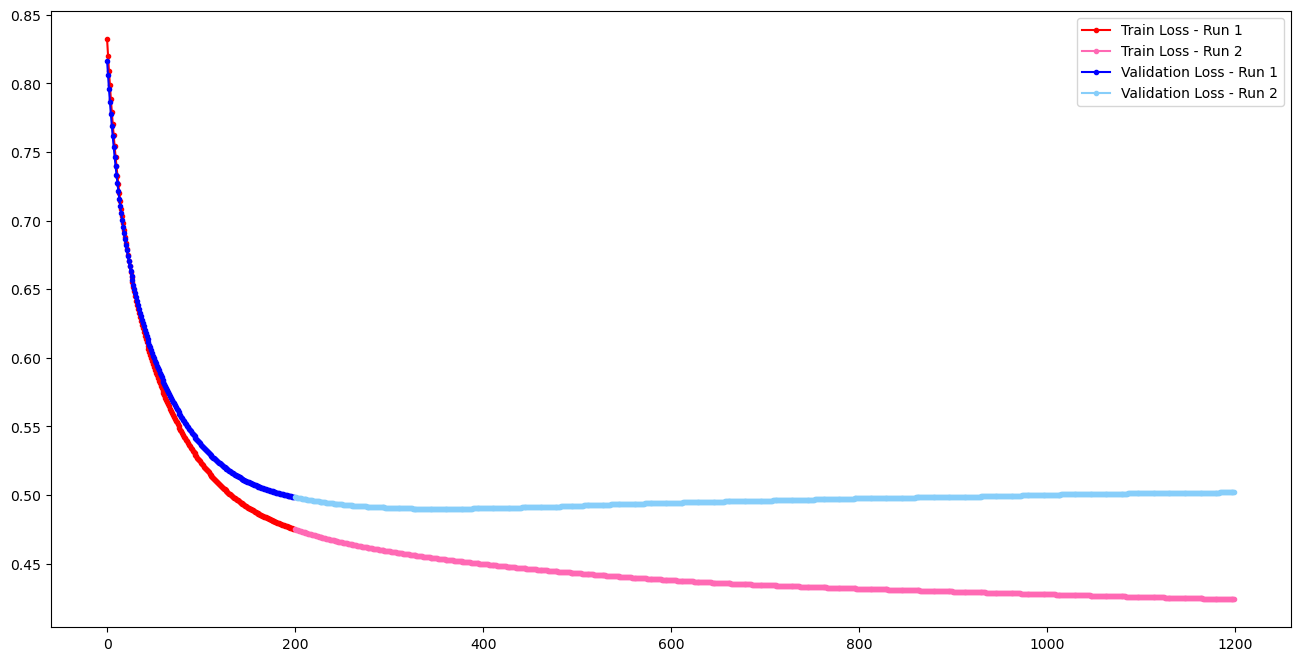

In [24]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()